# Apple Vs Foxconn Stock Analysis

#### Relationship Between Foxconn and Apple
Primary Manufacturer: Foxconn assembles most Apple devices, especially iPhones.
Shared Factories: Many Foxconn factories are dedicated to Apple products.
Revenue Dependence: 40-50% of Foxconn's revenue comes from Apple contracts.

#### Why Foxconn’s Stock Is Affected by Apple’s
Product Launches: Apple’s new product launches boost Foxconn’s stock due to increased production demand.
Supply Chain Issues: Disruptions at Foxconn affect Apple's ability to deliver, impacting both stocks.
Apple’s Performance: Strong Apple sales boost Foxconn’s stock; weaker sales or order cuts cause declines.
Market Perception: Investors view Foxconn’s stock as linked to Apple’s manufacturing health.

In [41]:
import yfinance as yf
import pandas as pd
from bs4 import BeautifulSoup
import requests
import datetime
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Web Scraping Stock Data Using yfinance

apple=yf.Ticker('AAPL')
foxconn=yf.Ticker('2317.TW')

# Scraping Apple stock data
apple_stock = apple.history(period="max")
apple_stock = apple_stock.interpolate(method='linear')
apple_stock.reset_index(inplace=True)
apple_stock['Date'] = pd.to_datetime(apple_stock['Date'])

print("APPLE STOCK :\n",apple_stock.head())

# Scraping Foxconn stock data (Foxconn is listed as Hon Hai Precision, symbol 2317.TW)
foxconn_stock = foxconn.history(period="max")
foxconn_stock = foxconn_stock.interpolate(method='linear')
foxconn_stock.reset_index(inplace=True)
foxconn_stock['Date'] = pd.to_datetime(foxconn_stock['Date'])

print("FOXCONN STOCK :\n",foxconn_stock.head())


APPLE STOCK :
         Date      Open      High       Low     Close     Volume  Dividends  \
0 1980-12-12  0.098943  0.099373  0.098943  0.098943  469033600        0.0   
1 1980-12-15  0.094211  0.094211  0.093781  0.093781  175884800        0.0   
2 1980-12-16  0.087328  0.087328  0.086898  0.086898  105728000        0.0   
3 1980-12-17  0.089049  0.089479  0.089049  0.089049   86441600        0.0   
4 1980-12-18  0.091630  0.092061  0.091630  0.091630   73449600        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
FOXCONN STOCK :
         Date      Open      High       Low     Close    Volume  Dividends  \
0 1993-01-05  0.399521  0.407075  0.397003  0.399521  33478780        0.0   
1 1993-01-06  0.398682  0.398682  0.389449  0.392806  46846584        0.0   
2 1993-01-07  0.392806  0.398682  0.389449  0.391128  44447315        0.0   
3 1993-01-08  0.396164  0.396164  0.376020  0.379377  43699448        0.0   
4 1993

In [43]:
# Web Scraping Apple Product Data from Wikipedia

url = "https://en.wikipedia.org/wiki/List_of_Apple_products"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extracting all the tables related to Apple products
tables = soup.find_all('table', {'class': 'wikitable'})

# Parsing the tables into DataFrames
apple_products = pd.read_html(str(tables))

# Combining all the tables into one DataFrame
apple_products_combined = pd.concat(apple_products, ignore_index=True)

# Drop the 'Family' column
apple_products_combined = apple_products_combined.drop(columns=['Family'])

apple_products_combined['Released'] = pd.to_datetime(apple_products_combined['Released'])
apple_products_combined['Discontinued'] = pd.to_datetime(apple_products_combined['Discontinued'], errors='coerce')


# Preview the updated DataFrame
print("Apple Products Data:\n", apple_products_combined.head())




Apple Products Data:
     Released              Model Discontinued  \
0 1976-04-11            Apple I   1977-09-30   
1 1977-06-01           Apple II   1979-05-01   
2 1978-06-01            Disk II   1984-05-01   
3 1979-06-01      Apple II Plus   1982-12-01   
4 1979-06-01  Apple II EuroPlus   1982-12-01   

  Timeline of Apple Inc. products .mw-parser-output .hlist dl,.mw-parser-output .hlist ol,.mw-parser-output .hlist ul{margin:0;padding:0}.mw-parser-output .hlist dd,.mw-parser-output .hlist dt,.mw-parser-output .hlist li{margin:0;display:inline}.mw-parser-output .hlist.inline,.mw-parser-output .hlist.inline dl,.mw-parser-output .hlist.inline ol,.mw-parser-output .hlist.inline ul,.mw-parser-output .hlist dl dl,.mw-parser-output .hlist dl ol,.mw-parser-output .hlist dl ul,.mw-parser-output .hlist ol dl,.mw-parser-output .hlist ol ol,.mw-parser-output .hlist ol ul,.mw-parser-output .hlist ul dl,.mw-parser-output .hlist ul ol,.mw-parser-output .hlist ul ul{display:inline}.mw-parser-ou

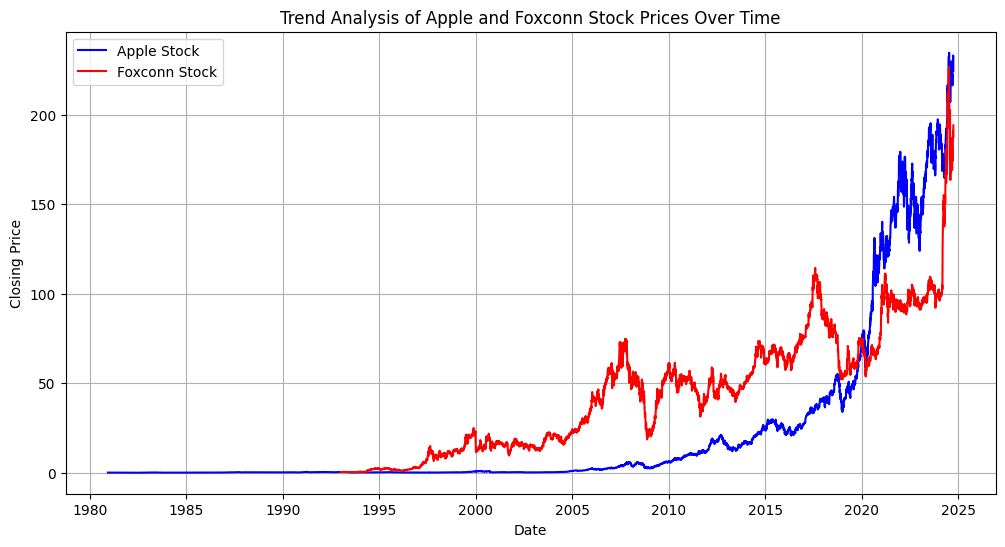

In [44]:
#Trend Analysis of Apple and Foxconn Stock Prices Over Time


# Sort data by Date to ensure correct chronological order
apple_stock = apple_stock.sort_values('Date')
foxconn_stock = foxconn_stock.sort_values('Date')

plt.figure(figsize=(12, 6))

# Plot Apple stock
plt.plot(apple_stock['Date'], apple_stock['Close'], label="Apple Stock", color='blue')

# Plot Foxconn stock
plt.plot(foxconn_stock['Date'], foxconn_stock['Close'], label="Foxconn Stock", color='red')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Trend Analysis of Apple and Foxconn Stock Prices Over Time')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


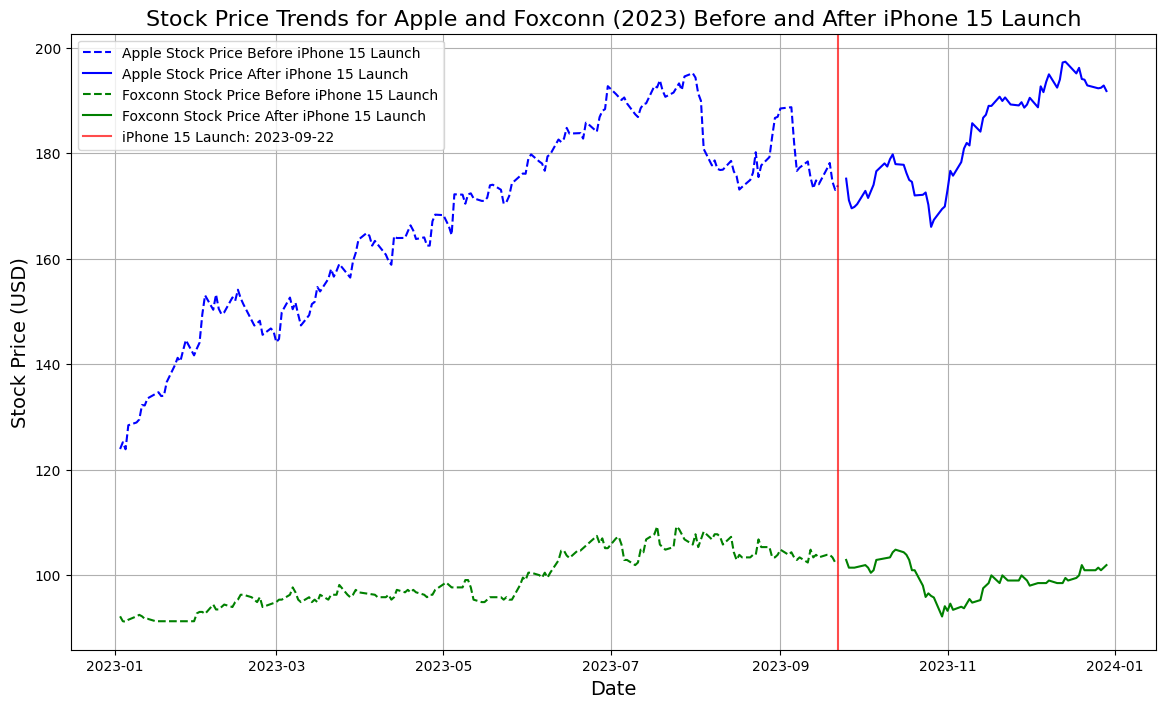

Apple Stock price before launch: 173.90013122558594
Apple Stock price after launch: 191.8021697998047
Foxconn Stock price before launch: 102.375
Foxconn Stock price after launch: 101.88750457763672
Percentage change in Apple stock price after iPhone 15 launch: 10.29%
Percentage change in Foxconn stock price after iPhone 15 launch: -0.48%


In [45]:
#Stock Price Trends for Apple and Foxconn (2023) Before and After iPhone 15 Launch


iphone_15_models = apple_products_combined[apple_products_combined['Model'].str.contains('iPhone 15', case=False, na=False)]

iphone_15_launch_date = iphone_15_models.iloc[0]['Released']

# Step 2: Filter stock data to only include dates from 2023
apple_stock_2023 = apple_stock[(apple_stock['Date'] >= '2023-01-01') & (apple_stock['Date'] <= '2023-12-31')]
foxconn_stock_2023 = foxconn_stock[(foxconn_stock['Date'] >= '2023-01-01') & (foxconn_stock['Date'] <= '2023-12-31')]

# Step 3: Filter stock data to only include dates before and after the iPhone 15 series release date
apple_stock_before_iphone = apple_stock_2023[apple_stock_2023['Date'] <= iphone_15_launch_date]
apple_stock_after_iphone = apple_stock_2023[apple_stock_2023['Date'] > iphone_15_launch_date]

foxconn_stock_before_iphone = foxconn_stock_2023[foxconn_stock_2023['Date'] <= iphone_15_launch_date]
foxconn_stock_after_iphone = foxconn_stock_2023[foxconn_stock_2023['Date'] > iphone_15_launch_date]

# Plot the stock trends before and after iPhone 15 series launch

plt.figure(figsize=(14, 8))

# Plot Apple stock prices before iPhone 15 launch
plt.plot(apple_stock_before_iphone['Date'], apple_stock_before_iphone['Close'], label='Apple Stock Price Before iPhone 15 Launch', color='blue', linestyle='--')

# Plot Apple stock prices after iPhone 15 launch
plt.plot(apple_stock_after_iphone['Date'], apple_stock_after_iphone['Close'], label='Apple Stock Price After iPhone 15 Launch', color='blue')

# Plot Foxconn stock prices before iPhone 15 launch
plt.plot(foxconn_stock_before_iphone['Date'], foxconn_stock_before_iphone['Close'], label='Foxconn Stock Price Before iPhone 15 Launch', color='green', linestyle='--')

# Plot Foxconn stock prices after iPhone 15 launch
plt.plot(foxconn_stock_after_iphone['Date'], foxconn_stock_after_iphone['Close'], label='Foxconn Stock Price After iPhone 15 Launch', color='green')

# Mark iPhone 15 launch date on the graph
plt.axvline(x=iphone_15_launch_date, linestyle='-', color='red', alpha=0.7, label=f'iPhone 15 Launch: {iphone_15_launch_date.date()}')

# Adding title, labels, and legend
plt.title('Stock Price Trends for Apple and Foxconn (2023) Before and After iPhone 15 Launch', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price (USD)', fontsize=14)
plt.legend(loc='upper left')

# Show the plot
plt.grid(True)
plt.show()

# Analyze the increase or decrease in stock price before and after the launch
apple_stock_start_price = apple_stock_before_iphone.iloc[-1]['Close']
apple_stock_end_price = apple_stock_after_iphone.iloc[-1]['Close']
foxconn_stock_start_price = foxconn_stock_before_iphone.iloc[-1]['Close']
foxconn_stock_end_price = foxconn_stock_after_iphone.iloc[-1]['Close']

print(f"Apple Stock price before launch: {apple_stock_start_price}")
print(f"Apple Stock price after launch: {apple_stock_end_price}")
print(f"Foxconn Stock price before launch: {foxconn_stock_start_price}")
print(f"Foxconn Stock price after launch: {foxconn_stock_end_price}")

# Calculate percentage change for both stocks
apple_price_change = ((apple_stock_end_price - apple_stock_start_price) / apple_stock_start_price) * 100
foxconn_price_change = ((foxconn_stock_end_price - foxconn_stock_start_price) / foxconn_stock_start_price) * 100

print(f"Percentage change in Apple stock price after iPhone 15 launch: {apple_price_change:.2f}%")
print(f"Percentage change in Foxconn stock price after iPhone 15 launch: {foxconn_price_change:.2f}%")



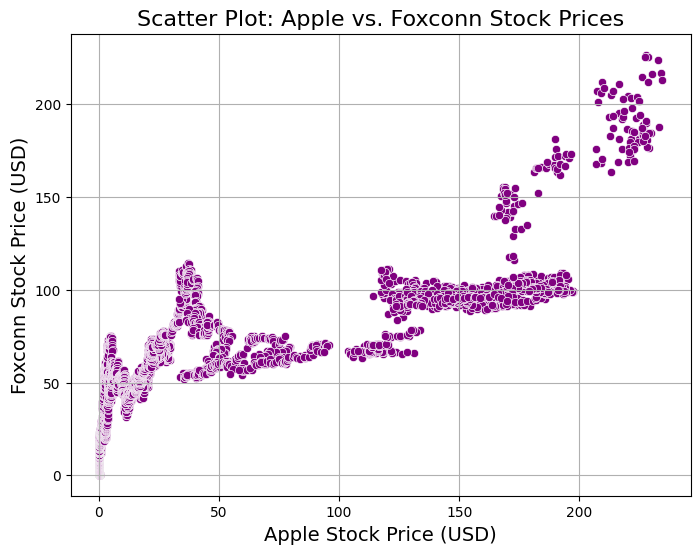

Pearson Correlation Coefficient between Apple and Foxconn stock prices:  0.8035002478725634
There is a strong positive correlation between Apple and Foxconn stocks.


In [9]:
#Correlation between Apple and Foxconn stock prices


# Filter stocks to align dates between Apple and Foxconn
merged_stock_data = pd.merge(apple_stock, foxconn_stock, on="Date", suffixes=('_apple', '_foxconn'))

# Extract the closing prices for correlation analysis
apple_close_prices = merged_stock_data['Close_apple']
foxconn_close_prices = merged_stock_data['Close_foxconn']

# Scatter plot to visually inspect the correlation between stock movements
plt.figure(figsize=(8, 6))
sns.scatterplot(x=apple_close_prices, y=foxconn_close_prices, color='purple')
plt.title('Scatter Plot: Apple vs. Foxconn Stock Prices', fontsize=16)
plt.xlabel('Apple Stock Price (USD)', fontsize=14)
plt.ylabel('Foxconn Stock Price (USD)', fontsize=14)
plt.grid(True)
plt.show()

# Compute Pearson correlation coefficient
correlation = apple_close_prices.corr(foxconn_close_prices)

# Display the correlation coefficient
print("Pearson Correlation Coefficient between Apple and Foxconn stock prices: ",correlation)

# Analysis: Interpret the correlation
if correlation > 0.7:
    print("There is a strong positive correlation between Apple and Foxconn stocks.")
elif 0.3 < correlation <= 0.7:
    print("There is a moderate positive correlation between Apple and Foxconn stocks.")
elif correlation < -0.3:
    print("There is a strong negative correlation between Apple and Foxconn stocks.")
else:
    print("There is little to no correlation between Apple and Foxconn stocks.")


In [48]:
# Max and Min Stock Prices


# Ensure the 'Date' column is in datetime format, if not already
apple_stock['Date'] = pd.to_datetime(apple_stock['Date']).dt.date
foxconn_stock['Date'] = pd.to_datetime(foxconn_stock['Date']).dt.date

# Find the maximum and minimum stock prices for Apple
apple_max_price = apple_stock['Close'].max()
apple_max_date = apple_stock.loc[apple_stock['Close'] == apple_max_price, 'Date'].values[0]

apple_min_price = apple_stock['Close'].min()
apple_min_date = apple_stock.loc[apple_stock['Close'] == apple_min_price, 'Date'].values[0]

# Find the maximum and minimum stock prices for Foxconn
foxconn_max_price = foxconn_stock['Close'].max()
foxconn_max_date = foxconn_stock.loc[foxconn_stock['Close'] == foxconn_max_price, 'Date'].values[0]

foxconn_min_price = foxconn_stock['Close'].min()
foxconn_min_date = foxconn_stock.loc[foxconn_stock['Close'] == foxconn_min_price, 'Date'].values[0]

# Display the results with only the date (no timestamp)
print("Apple Stock (Entire Duration):")
print(f"Maximum Price: {apple_max_price} on {apple_max_date}")
print(f"Minimum Price: {apple_min_price} on {apple_min_date}")

print("\nFoxconn Stock (Entire Duration):")
print(f"Maximum Price: {foxconn_max_price} on {foxconn_max_date}")
print(f"Minimum Price: {foxconn_min_price} on {foxconn_min_date}")


Apple Stock (Entire Duration):
Maximum Price: 234.54852294921875 on 2024-07-16
Minimum Price: 0.03785646706819534 on 1982-07-08

Foxconn Stock (Entire Duration):
Maximum Price: 226.5 on 2024-07-08
Minimum Price: 0.35839390754699707 on 1993-07-20


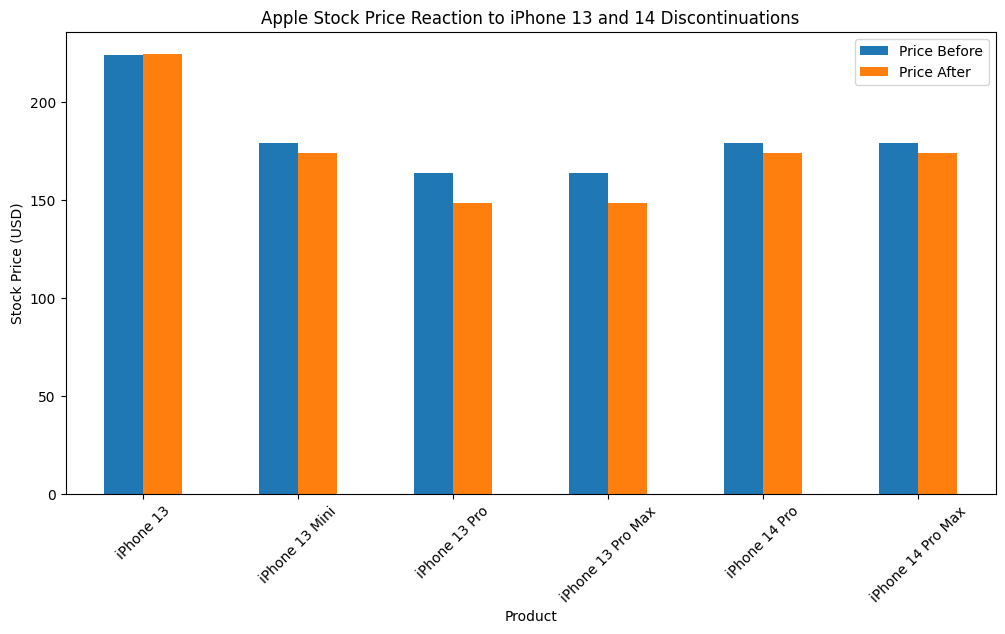

In [51]:
iphone_13_14_series = apple_products_combined[apple_products_combined['Model'].str.contains('iPhone 13|iPhone 14', case=False, na=False)]

price_before_discontinuation = []
price_after_discontinuation = []
product_models = []

# Loop through each iPhone 13/14 series product
for index, product in iphone_13_14_series.iterrows():
    discontinued_date = product['Discontinued']
    if pd.notnull(discontinued_date):
        # Get stock price 30 days before discontinuation
        stock_before = apple_stock[(apple_stock['Date'] >= discontinued_date - pd.DateOffset(days=30)) &
                                   (apple_stock['Date'] <= discontinued_date)]
        
        # Get stock price 30 days after discontinuation
        stock_after = apple_stock[(apple_stock['Date'] > discontinued_date) &
                                  (apple_stock['Date'] <= discontinued_date + pd.DateOffset(days=30))]

        # Get the average price before and after discontinuation (optional: could use median, last price, etc.)
        avg_price_before = stock_before['Close'].mean()
        avg_price_after = stock_after['Close'].mean()

        price_before_discontinuation.append(avg_price_before)
        price_after_discontinuation.append(avg_price_after)
        product_models.append(product['Model']) 

# Create a DataFrame to show the effect of discontinuation on stock price
discontinuation_effect = pd.DataFrame({
    'Product': product_models,
    'Price Before': price_before_discontinuation,
    'Price After': price_after_discontinuation
})

# Plot the stock price changes
if not discontinuation_effect.empty:
    discontinuation_effect.set_index('Product').plot(kind='bar', figsize=(12, 6))
    
    # Adding labels and title
    plt.title('Apple Stock Price Reaction to iPhone 13 and 14 Discontinuations')
    plt.xlabel('Product')
    plt.ylabel('Stock Price (USD)')
    plt.xticks(rotation=45)
    
    plt.show()
else:
    print("No valid stock data available for iPhone 13 and 14 series discontinuation dates.")

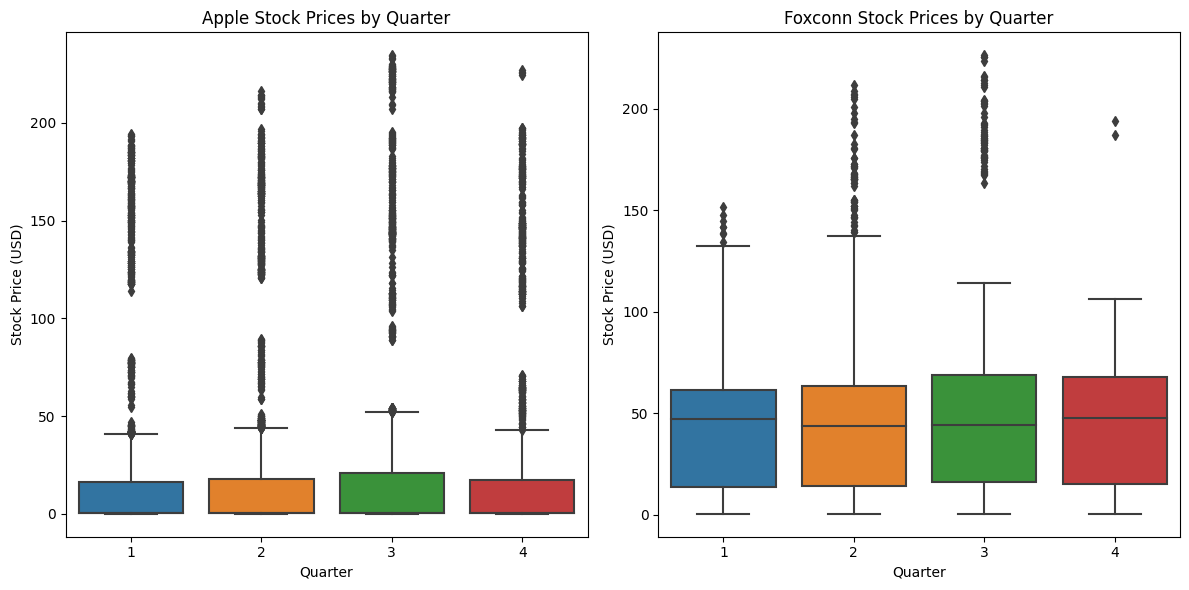

In [52]:
# Apple & Foxconn Stock Prices by Quarter


apple_stock['Date'] = pd.to_datetime(apple_stock['Date'], errors='coerce')
foxconn_stock['Date'] = pd.to_datetime(foxconn_stock['Date'], errors='coerce')

# Add a column for the quarter for both Apple and Foxconn stocks
apple_stock['Quarter'] = apple_stock['Date'].dt.quarter
foxconn_stock['Quarter'] = foxconn_stock['Date'].dt.quarter

plt.figure(figsize=(12, 6))

# Apple stock price by quarter
plt.subplot(1, 2, 1)
sns.boxplot(x=apple_stock['Quarter'], y=apple_stock['Close'])
plt.title('Apple Stock Prices by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Stock Price (USD)')

# Foxconn stock price by quarter
plt.subplot(1, 2, 2)
sns.boxplot(x=foxconn_stock['Quarter'], y=foxconn_stock['Close'])
plt.title('Foxconn Stock Prices by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Stock Price (USD)')

plt.tight_layout()
plt.show()



In [53]:
# For Tableau Analysis

dfs=[apple_stock,foxconn_stock]

In [55]:
for df in dfs:
    df['Previous day close price'] = df.Close.shift(1)

In [56]:
for df in dfs:
    df['Change in price'] = df['Close'] - df['Previous day close price']

In [57]:
for df in dfs:
    df['Percent change in price'] = df.Close.pct_change()

In [58]:
for df in dfs:
    df['Previous day volume'] = df.Volume.shift(1)

In [60]:
for df in dfs:
    df['Change in volume'] = df['Volume'] - df['Previous day volume']

In [61]:
for df in dfs:
    df['Percent change in volume'] = df.Volume.pct_change()

In [62]:
# Exporting Data for Tableau Visualization
apple_stock.to_csv('apple_stock_data.csv')
foxconn_stock.to_csv('foxconn_stock_data.csv')
apple_products_combined.to_csv('apple_products_data.csv')

print("Data exported to CSV for Tableau visualization.")

Data exported to CSV for Tableau visualization.


## Insights

### Quarterly Stock Trends:
Both Apple and Foxconn show seasonal trends, with notable changes in stock prices by quarter. Apple's stock price tends to rise during quarters with product launches (e.g., iPhone releases), and Foxconn often follows suit due to its role in manufacturing.

### Price Volatility:
Apple experiences more stable price movements compared to Foxconn, indicating stronger market confidence. Foxconn, being a supplier, shows higher volatility, reflecting its dependence on Apple's production cycles and external factors like supply chain disruptions.

### Impact of Product Releases:
Apple's stock price typically reacts positively to new product launches, which boosts Foxconn’s stock as well due to higher manufacturing demand. Delays or lower-than-expected sales from Apple negatively affect Foxconn’s stock.

### Volume and Price Changes:
Daily price and volume changes for both stocks highlight their sensitivity to major events, with Foxconn showing sharper reactions, suggesting a more volatile market response to Apple-related news.